In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ev = pd.read_csv('/content/Electric_Vehicle_Population_Data.csv')
ev.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


Explore the data and clean it

In [ ]:
ev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [ ]:
ev.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

The null values in this dataset seems to be less then 2% of the data, hence, we can drop these.

In [ ]:
ev = ev.dropna()

To analyze the market size of the electric vehicles let's explore some points: <br>
- Embark on an electrifying journey: witness EV adoption flourish through model years.
- Unlock the geographical tapestry: uncover hotspots where EVs thrive, by county or city.
- Decipher the EV spectrum: dissect the dataset by electric vehicle types (BEV, etc.).
- Unveil the frontrunners: pinpoint the most sought-after makes and models among registered EVs.
- Dive into the realm of electric range: dissect vehicle capabilities, tracking EV technology's evolution.
- Forecast the electric surge: Unravel the estimated growth in electric vehicle market size, igniting excitement.

Embark on an electrifying journey: witness EV adoption flourish through model years.

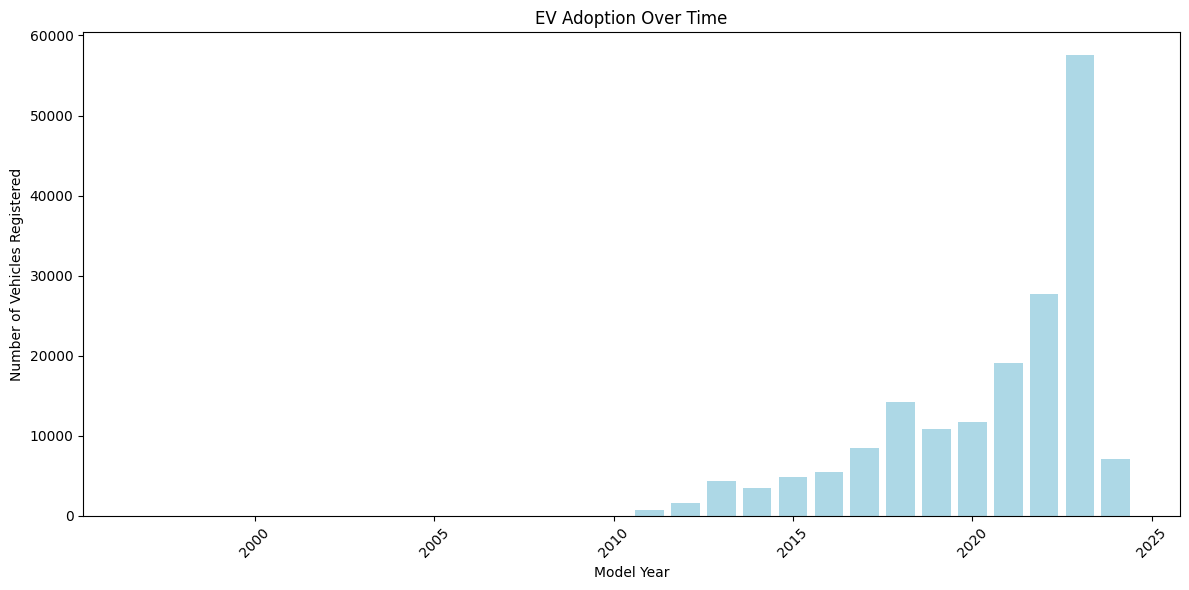

In [ ]:
# EV Adoption Over Time
plt.figure(figsize=(12, 6))
ev_adoption_by_year = ev['Model Year'].value_counts().sort_index()
plt.bar(ev_adoption_by_year.index, ev_adoption_by_year.values, color='lightblue')
plt.title('EV Adoption Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles Registered')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
import plotly.express as px

ev_adoption_by_year = ev['Model Year'].value_counts().sort_index()

# Create a bar plot for EV adoption over time using Plotly Express
fig = px.bar(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values,
             labels={'x': 'Model Year', 'y': 'Number of Vehicles Registered'},
             title='EV Adoption Over Time',
             color_continuous_scale='viridis')

# Rotate x-axis labels
fig.update_layout(xaxis_tickangle=45)

# Center the title
fig.update_layout(title_x=0.5)

# Show the plot
fig.show()

- The bar chart vividly illustrates the progressive surge in EV adoption, notably accelerating from 2016 onwards.
- A modest growth trajectory precedes this pivotal point, leading to a marked uptick in registered EVs, particularly evident from 2017 onwards.
- The pinnacle of this evolution shines through in 2023, with a striking peak symbolizing the zenith of EV adoption, encapsulating a remarkable journey of sustainable mobility.

Unlock the geographical tapestry: uncover hotspots where EVs thrive, by county or city.

In [ ]:
import plotly.express as px

# Get the top 3 counties by EV registration
ev_county_distribution = ev['County'].value_counts()
top_counties = ev_county_distribution.head(3).index

# Filter the dataset for these top counties
top_counties_data = ev[ev['County'].isin(top_counties)]

# Analyze the distribution of EVs within the cities of these top counties
ev_city_distribution_top_counties = top_counties_data.groupby(['County', 'City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# Sort the data in descending order by 'Number of Vehicles'
ev_city_distribution_top_counties = ev_city_distribution_top_counties.sort_values(by='Number of Vehicles', ascending=False)

# Visualize the top 10 cities across these counties
top_cities = ev_city_distribution_top_counties.head(10)

fig = px.bar(top_cities, x='Number of Vehicles', y='City', color='County', barmode='group', orientation='h',
             title='Top Cities in Top Counties by EV Registrations',
             labels={'Number of Vehicles': 'Number of Vehicles Registered', 'City': 'City'},
             height=600, width=800)
fig.update_layout(xaxis_title='Number of Vehicles Registered', yaxis_title='City')
fig.show()


The graphical analysis highlights distinct trends in EV registrations across cities within King, Snohomish, and Pierce counties:
- Seattle stands as the undisputed leader in EV adoption, dominating with a substantial margin over other cities in King County.
- Bellevue and Redmond, also in King County, follow suit, albeit with significantly fewer registrations compared to Seattle.
- Cities in Snohomish County, like Kirkland and Sammamish, demonstrate moderate EV adoption, while Tacoma and Tukwila, representing Pierce County, trail behind with fewer registrations.
- King County emerges as the powerhouse in EV adoption among the three counties, showcasing a concentration of registrations, underlining the non-uniform distribution of EV adoption across the region.

In [ ]:
# Count of vehicles registered in each legislative district
ev_district_distribution = ev['Legislative District'].value_counts().reset_index()
ev_district_distribution.columns = ['Legislative District', 'Number of Vehicles']

# Sort by the number of vehicles in descending order
ev_district_distribution = ev_district_distribution.sort_values(by='Number of Vehicles', ascending=False)

# Top 10 legislative districts with the highest number of registered electric vehicles
top_districts = ev_district_distribution.head(10)

# Create a treemap for top legislative districts with highest electric vehicle registrations using Plotly Express
fig = px.treemap(top_districts, path=['Legislative District'], values='Number of Vehicles',
                 title='Legislative Districts with Highest Electric Vehicle Registrations',
                 color='Number of Vehicles', color_continuous_scale='Viridis')

# Update layout for better visualization
fig.update_layout(margin=dict(t=50, l=0, r=0, b=0))

# Show the plot
fig.show()

Decipher the EV spectrum: dissect the dataset by electric vehicle types (BEV, etc.).

In [ ]:
# Define custom colors
colors = px.colors.qualitative.Set2

# Analyzing the distribution of electric vehicle types
ev_type_distribution = ev['Electric Vehicle Type'].value_counts()

fig = px.bar(ev_type_distribution, x=ev_type_distribution.values, y=ev_type_distribution.index, orientation='h',
             title='Distribution of Electric Vehicle Types',
             labels={'x': 'Number of Vehicles Registered', 'y': 'Electric Vehicle Type'},
             height=600, width=1200, color=ev_type_distribution.index, color_discrete_sequence=colors)
fig.update_layout(yaxis_categoryorder='total ascending')
fig.show()

The depicted data unveils a clear preference for Battery Electric Vehicles (BEVs) over Plug-in Hybrid Electric Vehicles (PHEVs) among registered electric vehicles in the United States.

- Unveil the frontrunners: pinpoint the most sought-after makes and models among registered EVs.

In [ ]:
# Analyzing the popularity of EV manufacturers
ev_make_distribution = ev['Make'].value_counts().head(10)  # Limiting to top 10 for clarity

fig = px.bar(ev_make_distribution, x=ev_make_distribution.values, y=ev_make_distribution.index, orientation='h',
             title='Top 10 Popular EV Makes',
             labels={'x': 'Number of Vehicles Registered', 'y': 'Make'},
             height=600, width=1100, color=ev_make_distribution.index, color_discrete_sequence=px.colors.qualitative.Prism)
fig.show()

- The depicted chart unveils TESLA's commanding lead in registered vehicles, followed distantly by NISSAN and CHEVROLET.
- FORD, BMW, KIA, TOYOTA, VOLKSWAGEN, JEEP, and HYUNDAI trail in descending order of registrations.

Dive into the realm of electric range: Dissect vehicle capabilities, tracking EV technology's evolution.

In [ ]:
# Selecting the top 3 manufacturers based on the number of vehicles registered
top_3_makes = ev_make_distribution.head(3).index

# Filtering the dataset for these top manufacturers
top_makes_data = ev[ev['Make'].isin(top_3_makes)]

# Analyzing the popularity of EV models within these top manufacturers
ev_model_distribution_top_makes = top_makes_data.groupby(['Make', 'Model']).size().reset_index(name='Number of Vehicles')

# Sort the data in descending order by 'Number of Vehicles'
ev_model_distribution_top_makes = ev_model_distribution_top_makes.sort_values(by='Number of Vehicles', ascending=False)

# Visualizing the top 10 models across these manufacturers for clarity
top_models = ev_model_distribution_top_makes.head(10)

fig = px.bar(top_models, x='Number of Vehicles', y='Model', color='Make', barmode='group',
             title='Top Models in Top 3 Makes by EV Registrations',
             labels={'Number of Vehicles': 'Number of Vehicles Registered', 'Model': 'Model'},
             height=600, width=1000, color_discrete_sequence=px.colors.qualitative.Prism)
fig.update_layout(yaxis_title='Model', title_x=0.5)
fig.show()

The provided graph delineates the distribution of electric vehicle registrations across various models from the top manufacturers: TESLA, NISSAN, and CHEVROLET.
- TESLA's MODEL Y emerges as the most registered vehicle, closely followed by the MODEL 3, showcasing TESLA's dominance in the market.
- NISSAN's LEAF secures the third position, distinguishing itself as the most registered non-TESLA vehicle, reflecting NISSAN's competitive standing in the EV landscape.
- TESLA's MODEL S and MODEL X also exhibit notable registration numbers, underscoring the brand's diverse lineup and popularity across models.
- CHEVROLET's BOLT EV and VOLT claim significant registrations, with BOLT EUV following closely, indicating CHEVROLET's presence in the EV market.
- Lesser registrations are observed for NISSAN's ARIYA and CHEVROLET's SPARK, rounding out the model distribution among the top manufacturers.

Explore the pivotal electric range distribution among vehicles, illuminating trends in range advancements over time and distinctions across vehicle types and manufacturers.

In [ ]:
# Calculate the mean electric range rounded to two decimal points
mean_range = round(ev['Electric Range'].mean(), 2)

# Create a histogram with Plotly Express
fig = px.histogram(ev, x='Electric Range', nbins=30, histnorm='density', marginal='rug',
                   title=f'Distribution of Electric Vehicle Ranges (Mean Range: {mean_range} miles)',
                   labels={'Electric Range': 'Electric Range (miles)', 'density': 'Density'})
fig.update_traces(marker_color='royalblue', marker_line_color='black', marker_line_width=0.5)
fig.update_layout(xaxis_title='Electric Range (miles)', yaxis_title='Density', showlegend=False, title_x=0.5)
fig.add_vline(x=mean_range, line_dash="dot", line_color="red")
fig.show()


The mean electric range graph illustrates several notable insights:

- A prominent peak occurs around the 50-mile mark, indicating a prevalence of vehicles with relatively low electric ranges.
- The distribution skews towards higher ranges, albeit with a long tail, suggesting a disparity in frequency between lower and higher ranges.
- The mean electric range stands at approximately 58.84 miles, showcasing a relatively modest average compared to the graph's highest ranges.
- Despite some vehicles boasting ranges up to 350 miles, a majority fall below the mean, emphasizing the prevalence of shorter-range EVs.
- This disparity underscores the availability of high-range EVs alongside a significant proportion of models with shorter ranges, contributing to the lower average.

Let's explore the trend of electric ranges over model years, shedding light on advancements in battery technology and vehicle design. A positive trend would signify ongoing improvements, addressing concerns such as range anxiety by offering EVs with increasingly longer driving ranges.

In [ ]:
# Calculating the average electric range by model year
average_range_by_year = ev.groupby('Model Year')['Electric Range'].mean().reset_index()

# Create a line plot with markers using Plotly Express
fig = px.line(average_range_by_year, x='Model Year', y='Electric Range', title='Average Electric Range by Model Year',
              labels={'Electric Range': 'Average Electric Range (miles)', 'Model Year': 'Model Year'},
              markers=True)
fig.update_traces(marker=dict(color='blue', symbol='circle', size=8))
fig.update_layout(xaxis_title='Model Year', yaxis_title='Average Electric Range (miles)', showlegend=False, title_x=0.5)
fig.show()

The graph portrays the progression of average electric vehicle ranges from around 2000 to 2024, unveiling significant insights:
- A consistent upward trajectory in average electric ranges suggests ongoing technological advancements and enhanced battery efficiency over the years.
- Notably, a peak is observed around 2020, representing the highest average range attained.
- Post-2020, a substantial decline in average range may indicate either incomplete data or the introduction of models with lower ranges.
- Despite the decline, recent data shows a modest rebound in average range, signaling potential recovery or stabilization.
- Overall, the data underscores a decades-long trend of augmenting electric vehicle ranges, despite occasional fluctuations, affirming the industry's commitment to enhancing EV capabilities.

Embark on an electrifying journey through the realm of electric range, where top manufacturers and models vie for supremacy, revealing the cutting-edge advancements and standout performers shaping the future of sustainable mobility.

In [ ]:
# Calculate the average electric range by make and model
average_range_by_model = top_makes_data.groupby(['Make', 'Model'])['Electric Range'].mean().reset_index()

# Sort the data to get the top 10 models with the highest average electric range
top_range_models = average_range_by_model.sort_values(by='Electric Range', ascending=False).head(10)

# Create a grouped bar plot with Plotly Express using "pastel" color palette
fig = px.bar(top_range_models, x='Electric Range', y='Model', color='Make',
             title='Top 10 Models by Average Electric Range in Top Makes',
             labels={'Electric Range': 'Average Electric Range (miles)', 'Model': 'Model'},
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(yaxis_title='Model', xaxis_title='Average Electric Range (miles)', title_x=0.5)
fig.show()

- The TESLA ROADSTER leads with the highest average electric range.
- TESLA dominates the top positions, while CHEVROLET BOLT EV stands out. NISSAN LEAF and CHEVROLET SPARK have lower average ranges.

# Estimated Market Size Analysis of Electric Vehicles in the United States

- Let's begin by tallying the annual count of registered electric vehicles (EVs) in the United States.

In [ ]:
# calculate the number of EVs registered each year
ev_registration_counts = ev['Model Year'].value_counts().sort_index()
ev_registration_counts

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
2024     7072
Name: count, dtype: int64


Explore the dynamic landscape of EV registrations:
- In 2021, 19,063 EVs hit the roads, marking a promising start.
- By 2022, the EV community expanded to 27,708, signaling growing adoption.
- The momentum surged in 2023, with a remarkable 57,519 EVs registered, showcasing accelerating enthusiasm for electric mobility.
- As of 2024, 7,072 EVs are already on record, hinting at continued growth and a bright future ahead.

Forecast the electric surge: Unravel the estimated growth in electric vehicle market size, igniting excitement.

Let's project the total number of EVs expected to be registered in 2024 and forecast the market size for the next five years using a Compound Annual Growth Rate (CAGR) approach based on previous complete years.
- We'll calculate the growth rate between 2023 and an earlier year and apply it to estimate the market size.

In [ ]:
# filter the dataset to include years with complete data, assuming 2023 is the last complete year
filtered_years = ev_registration_counts[ev_registration_counts.index <= 2023]

# calculate the growth rate 'b' and initial value 'a' manually
delta_years = filtered_years.index - filtered_years.index.min()
delta_values = np.log(filtered_years.values)
b, a_log = np.polyfit(delta_years, delta_values, 1)

# convert 'a' back to its original scale
a = np.exp(a_log)

# forecast the number of EVs for 2024 and the next five years
forecast_years = np.arange(2024, 2024 + 6) - filtered_years.index.min()
forecasted_values = a * np.exp(b * forecast_years)

# create a dictionary to display the forecasted values for easier interpretation
forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(), forecasted_values))

# Print forecasted values one below the other
for year, evs in forecasted_evs.items():
    print(f"Forecasted EVs for {year}: {evs:.2f}")

Forecasted EVs for 2024: 125219.69
Forecasted EVs for 2025: 196721.45
Forecasted EVs for 2026: 309051.47
Forecasted EVs for 2027: 485523.10
Forecasted EVs for 2028: 762761.88
Forecasted EVs for 2029: 1198306.91


Now, let’s plot the estimated market size data:

In [ ]:
import plotly.graph_objects as go

# Prepare data for plotting
years = np.arange(filtered_years.index.min(), 2029 + 1)
actual_years = filtered_years.index
forecast_years_full = np.arange(2024, 2029 + 1)

# Actual and forecasted values
actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]

# Create traces for actual registrations and forecasted registrations
actual_trace = go.Scatter(x=actual_years, y=actual_values, mode='lines+markers', name='Actual Registrations', line=dict(color='blue'))
forecasted_trace = go.Scatter(x=forecast_years_full, y=forecasted_values_full, mode='lines+markers', name='Forecasted Registrations', line=dict(color='red', dash='dash'))

# Create a figure and add traces
fig = go.Figure()
fig.add_trace(actual_trace)
fig.add_trace(forecasted_trace)

# Update layout with title, axis labels, legend, and grid
fig.update_layout(title='Current & Estimated EV Market', xaxis_title='Year',
                  yaxis_title='Number of EV Registrations', legend=dict(x=0, y=1.0,
                  bgcolor='rgba(255, 255, 255, 0.5)', bordercolor='rgba(255, 255, 255, 0)'),
                  xaxis=dict(showgrid=True, gridcolor='lightgray'), yaxis=dict(showgrid=True, gridcolor='lightgray'))

# Show the plot
fig.show()


The analysis of the graph reveals several key insights:
- A notable shift occurred around 2010, marked by a steep and consistent rise in actual EV registrations, signaling a substantial increase in adoption.
- The forecasted data predicts an even more pronounced surge in EV registrations in the near future, indicating a significant acceleration in adoption.
- The projected steep increase in registrations suggests a promising expansion of the EV market size. This trend implies growing consumer acceptance of EVs, likely to continue driving the market forward.
- The data underscores a promising outlook for the EV industry, indicating a notable shift in consumer preferences and potential opportunities for increased investment and business growth.
- In summary, the analysis points towards a bright future for the EV sector, driven by increasing consumer interest and adoption, paving the way for significant growth and innovation in the industry.

Our analysis of the electric vehicle market size reveals a promising future for the EV industry. It highlights a notable shift in consumer preferences towards sustainable mobility solutions, offering a glimpse into potential investment and business opportunities within this growing sector.

**Insights**
- Steady Growth: EV registrations surged from 19,063 in 2021 to 57,519 in 2023, indicating a remarkable 202% increase over just two years.
- Promising Projections: Forecasted registrations for 2024 hint at an even more impressive growth trajectory, with a sharp rise expected in the coming years, reflecting consumer enthusiasm and a projected increase of over 50% compared to 2023.
- Market Potential: The surge in EV registrations underscores substantial market potential. A notable shift in consumer preferences towards electric mobility presents growth opportunities for businesses.
- Investment Outlook: The promising future for the EV sector signals potential investment opportunities. As consumer interest grows, businesses can explore avenues for innovation and expansion.